In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/sales.csv")
sales.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,5,141,64,3,340,128,Bad,38,13,Yes,No,no


In [3]:
sales.drop('Unnamed: 0',axis=1, inplace=True)
sales.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,141,64,3,340,128,Bad,38,13,Yes,No,no


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  high         400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


#### Preprocess the data
a. Encode categorical columns  
b. Scale numeric columns

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
le = LabelEncoder()
scaler = StandardScaler()

In [7]:
for col in sales.columns:
    if sales[col].dtype == 'object':
        sales[col] = le.fit_transform(sales[col])
    else:
        sales[col] = scaler.fit_transform(sales[[col]])

sales.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,1,0.721723,-1.490113,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,2,0.350895,-0.725953,1,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,2,0.103677,0.038208,1,1,0
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0,0


### Split the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = sales.iloc[:,:10]
y = sales.iloc[:,10]

In [10]:
X.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,1,0.721723,-1.490113,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,2,0.350895,-0.725953,1,1


In [11]:
y.head(3)

0    1
1    1
2    1
Name: high, dtype: int32

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 10), (80, 10), (320,), (80,))

### XGBOOST

In [13]:
#!pip install xgboost

In [14]:
from xgboost import XGBClassifier

In [15]:
xgb_model = XGBClassifier(n_estimators = 100, max_depth=6, max_leaves=10, gamma=0.1, learning_rate=0.3, subsample=0.3)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=10, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

#### Evaluate model on training data

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [17]:
def plot_roc(y,yhat):

    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y, yhat)
    print(f'AUC: {auc}')
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'o--')
    plt.show()

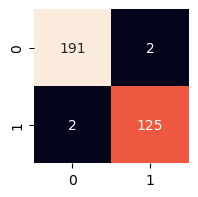

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       193
           1       0.98      0.98      0.98       127

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

AUC: 0.9869446371017094


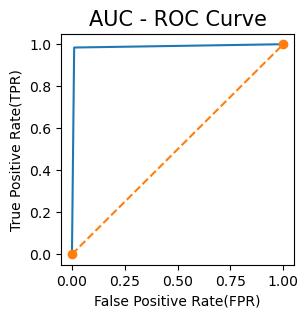

In [18]:
yhat_train = xgb_model.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
cm
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()
print(classification_report(y_train,yhat_train))
plot_roc(y_train,yhat_train)

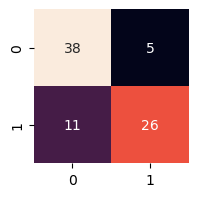

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.84      0.70      0.76        37

    accuracy                           0.80        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.80      0.80      0.80        80

AUC: 0.7932118164676304


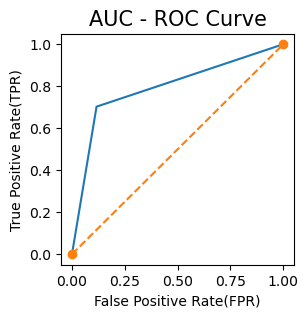

In [19]:
yhat_test = xgb_model.predict(X_test)
cm = confusion_matrix(y_test,yhat_test)
cm
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()
print(classification_report(y_test,yhat_test))
plot_roc(y_test,yhat_test)

### Light GBM

In [20]:
#!pip install lightgbm

In [21]:
from lightgbm import LGBMClassifier

In [22]:
lgb_model = LGBMClassifier(n_estimators = 100, max_depth=6, max_leaves=10, gamma=0.1, learning_rate=0.3, subsample=0.3)
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] num_leaves is set=31, max_leaves=10 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] num_leaves is set=31, max_leaves=10 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 127, number of negative: 193
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.396875 -> initscore=-0.418503
[LightGBM] [Info] Start training from score -0.418503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(gamma=0.1, learning_rate=0.3, max_depth=6, max_leaves=10,
               subsample=0.3)

#### Evaluate model on training data

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] num_leaves is set=31, max_leaves=10 will be ignored. Current value: num_leaves=31


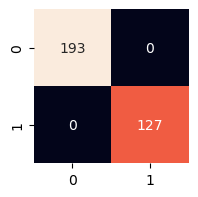

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       127

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

AUC: 1.0


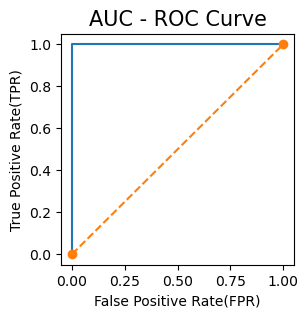

In [23]:
yhat_train = lgb_model.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
cm
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()
print(classification_report(y_train,yhat_train))
plot_roc(y_train,yhat_train)

#### Evaluate model on testing data

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] num_leaves is set=31, max_leaves=10 will be ignored. Current value: num_leaves=31


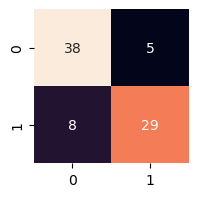

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        43
           1       0.85      0.78      0.82        37

    accuracy                           0.84        80
   macro avg       0.84      0.83      0.84        80
weighted avg       0.84      0.84      0.84        80

AUC: 0.8337523570081711


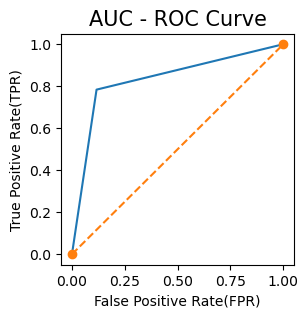

In [24]:
yhat_test = lgb_model.predict(X_test)
cm = confusion_matrix(y_test,yhat_test)
cm
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()
print(classification_report(y_test,yhat_test))
plot_roc(y_test,yhat_test)

### To Do

In [25]:
from sklearn.ensemble import GradientBoostingClassifier